In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
npoints = 1000
r = 20

def plot(radius, npoints):
    coord = []
    for i in range(npoints):
        x, y, z = np.random.uniform(low = -1, high=1, size=3)
        norm = 1/np.sqrt(x**2 + y**2 + z**2)
        x_norm = x*norm
        y_norm = y*norm
        z_norm = z*norm
        x_norm_r = x_norm*radius
        y_norm_r = y_norm*radius
        z_norm_r = z_norm*radius
        coord.append([x_norm_r, y_norm_r, z_norm_r])
    return coord

points = plot(r, npoints)

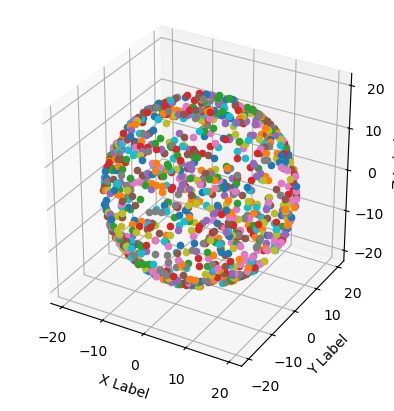

In [3]:
ax = plt.figure().add_subplot(projection='3d')
for i in points:
    ax.scatter(i[0], i[1], i[2])
    ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [6]:
def generate_cube_surface_points(cube_size, num_points):
    """
    Generate points on the surface of a cube.

    Parameters:
    cube_size (float): The size of the cube.
    num_points (int): The number of points to generate.

    Returns:
    points (numpy array): An array of points on the surface of the cube.
    """
    # Define the faces of the cube
    faces = [
        [(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 1, 0)],  # bottom
        [(0, 0, 1), (1, 0, 1), (1, 1, 1), (0, 1, 1)],  # top
        [(0, 0, 0), (0, 0, 1), (1, 0, 1), (1, 0, 0)],  # front
        [(0, 1, 0), (0, 1, 1), (1, 1, 1), (1, 1, 0)],  # back
        [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1)],  # left
        [(1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1)],  # right
    ]

    # Generate points on each face
    points = []
    for face in faces:
        for _ in range(num_points // 6):  # 6 faces, so divide num_points by 6
            # Generate a random point on the face
            x = np.random.uniform(0, cube_size)
            y = np.random.uniform(0, cube_size)
            z = 0  # or cube_size, depending on the face
            if face == faces[0] or face == faces[5]:  # bottom or right
                z = 0
            elif face == faces[1] or face == faces[4]:  # top or left
                z = cube_size
            elif face == faces[2]:  # front
                z = np.random.uniform(0, cube_size)
            elif face == faces[3]:  # back
                z = cube_size - np.random.uniform(0, cube_size)
            points.append((x, y, z))

    return np.array(points)

cube_size = 10
num_points = 1000
points = generate_cube_surface_points(cube_size, num_points)


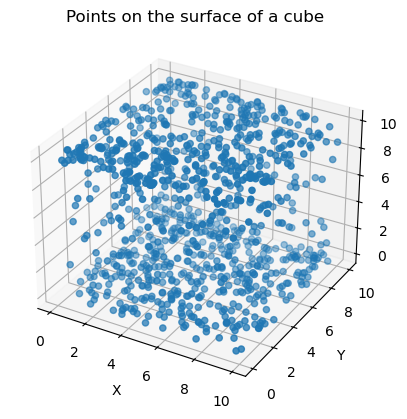

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Points on the surface of a cube')
plt.show()